In [3]:
#import package to use Twitter API
try:
    import tweepy #If tweepy is already installed on the system
except:
    !pip install tweepy

#import OS package to interact with file paths/OS commands
import os
#import pandas dataframe package
import pandas as pd
#import re package for the use of regular expressions
import re
#import package for string handling
import string
try:
    import emoji #If tweepy is already installed on the system
except:
    !pip install emoji

#import nltk package for text processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aruns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aruns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aruns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\aruns\anaconda3\lib\site-packages (3.8.1)


In [3]:
!pip install xgboost

In [4]:
import numpy as np
try:
    from wordcloud import WordCloud, STOPWORDS
except:
    !pip install wordcloud
    from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [6]:
import collections
import operator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import scipy.stats as ss
from dython.model_utils import roc_graph
from dython.nominal import associations
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, classification_report, log_loss, mean_squared_error
from sklearn.model_selection import learning_curve

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from collections import defaultdict

In [9]:
# Import the files required for performing Sentiment Analysis
senti_df = pd.read_csv('sentiment.csv')
elect_df = pd.read_csv('Canadian_elections_2019.csv')

In [10]:
senti_df.head(10)

,sentiment,text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ..."
2,Positive,I'm listening The Beatles now. They're great
3,Positive,@ddlovato could i please get a shout out or an...
4,Positive,@salspizza just spotted ur message there Tony ...
5,Negative,"finished watching Lost 514.... oh Faraday, pit..."
6,Positive,Hoping for a nice day today!
7,Positive,"@inque54 huy, matulog ka na. hahah. CBroom ain..."
8,Positive,@GiggyPig you're not the only one who likes de...
9,Negative,is at work waiting for shortlisting results a...


In [11]:
elect_df.head(10)

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ..."
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h..."
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d..."
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don..."
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh..."


### Data Cleaning
Cleaning up Canadian Elections 2019 tweets and preparing them so that they are fir for further processing & analysis.

In [15]:
# Define set of happy emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Function to remove emojis
def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)
 
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [14]:
def tweet_nlp(tweet):
    
    #remove the first character b
    tweet = re.sub('b"', '', tweet)        
    
    #before tokenizing, remove common content in tweets such as the RT sign, and links for retweets using regular expressions:
    tweet = re.sub(r'https?://\S+', '', tweet)
    tweet = re.compile('RT @').sub('@', tweet, count=1)
    
    #start by tokenize the tweet (separate it the text into words, or n-grams) with nltk
    word_tokens = word_tokenize(tweet) 
 
    #convert text into lowercase
    word_tokens = [word.lower() for word in word_tokens]
 
    #remove emoticons and emojis
    word_tokens = [word for word in word_tokens if not word in emoticons]
    word_tokens = [remove_emoji(word) for word in word_tokens]
    
    #remove punctuation signs from tokens
    table = str.maketrans('', '', string.punctuation)
    word_tokens = [word.translate(table) for word in word_tokens]
    
    #remove non-alphabetic characters
    word_tokens = [word for word in word_tokens if word.isalpha()]
    
    #remove stopwords
    stop_words = set(stopwords.words('english')) #import a predefined set of stopwords from the nltk package
    word_tokens = [word for word in word_tokens if not word in stop_words]
    
    #lemmatization of words (express in base form)
    lemmatizer = nltk.WordNetLemmatizer()
    word_tokens = [lemmatizer.lemmatize(word) for word in word_tokens]
    
    clean_tweet = [] #create empty list to store the final tokens after text processing
    for w in word_tokens:
        clean_tweet.append(w)

    #join the tokens of the clean tweet back into a string with spaces in between
    clean_tweet_str = ' '.join(clean_tweet)
    
    #return the clean tweet string
    return clean_tweet_str  

In [16]:
#Cleaning election tweets
clTweetList = [] 
for tweet in elect_df['text']:
    cleaned_tweet = tweet_nlp(tweet)
    clTweetList.append(cleaned_tweet)
elect_df['cleaned_tweets'] = clTweetList

In [17]:
elect_df.head(10)

,sentiment,negative_reason,text,cleaned_tweets
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadian ...
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n spacestation n etobic...
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost billion next year ask jus...
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadavotes n nnca nt decide help nn
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayer sick amp tired hard earned don...
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",cdnpoli fact blastfromthepast conservative int...
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",cdnmedia cdnpoli ppc rocky dong hand best elec...
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...",cdnpoli liberal double promised national debt ...
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",chooseforward cdnpoli nt make america mistake ...
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...",cpckinsellagatenlet see receipt pay warren kin...


In [16]:
#Cleaning sentiment tweets
clTweetList = [] 
for tweet in senti_df['text']:
    if( type(tweet) == str ):
        cleaned_tweet = tweet_nlp(tweet)
        clTweetList.append(cleaned_tweet)
    else:
        clTweetList.append('')
senti_df['cleaned_tweets'] = clTweetList

In [17]:
senti_df.head()

,sentiment,text,cleaned_tweets
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,diplomtcimmnty realdonaldtrump tried take amp ...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ...",damn jealous wan na watch fight love ufc one know
2,Positive,I'm listening The Beatles now. They're great,listening beatles great
3,Positive,@ddlovato could i please get a shout out or an...,ddlovato could please get shout anything huge ...
4,Positive,@salspizza just spotted ur message there Tony ...,salspizza spotted ur message tony replied


### Exploratory Data Analysis

#### Canadian Elections Data Visualizations

In [18]:
#Function to generate word cloud for Canadian Election tweets
def generateWordCloud(strInput):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',  
                    min_font_size = 10).generate(strInput) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = 'black') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [20]:
Elect_StringForWC 

'rosiebarton instead suggestion agree canadian woman trust andrewscheer conservative government protect woman right automony body let go cdnpoli canada abortionallwomanspacewalk real n spacestation n etobicokenorth cityofto onpoli cdnpolibrantford going cost billion next year ask justin cdnpoli canadacanada canadavotes n nnca nt decide help nncanada taxpayer sick amp tired hard earned donated corporate welfare bum nt need one many reason trudeaumustgo snclavalin leave canada care sheilacopps snclavalinscandal cdnpolicdnpoli fact blastfromthepast conservative introduced end longgun registry even though head police across canada victim group objected crime control public safety gunlobbycdnmedia cdnpoli ppc rocky dong hand best election video ever please google rocky dong box socialism nt seen go rockycdnpoli liberal double promised national debt next term reelected forecasting billion wout national pharmacare program incl wout ndp coalition billion seems possible imochooseforward cdnpoli

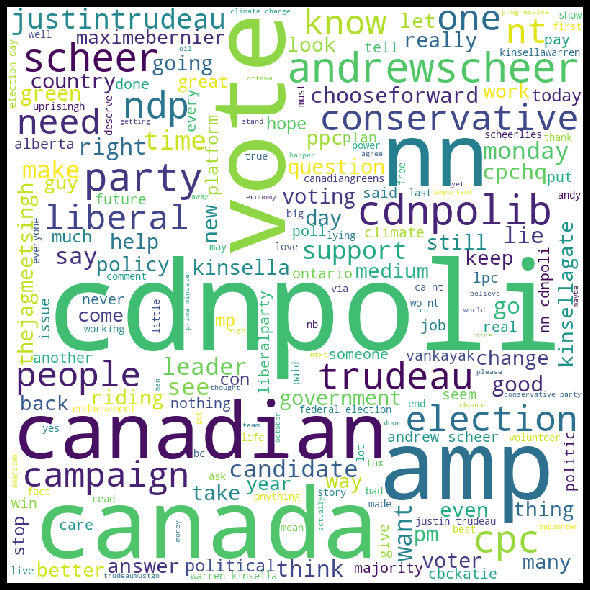

In [19]:
#Generating word cloud for election data
Elect_StringForWC = ""
for tweet in elect_df['cleaned_tweets']:
    for word in tweet:
        Elect_StringForWC = Elect_StringForWC + word

generateWordCloud(Elect_StringForWC)

From the word cloud, we can see that the hashtag #cdnpoli used to refer to Canadian Politics is very popular. This makes sense because this is a fairly bipartisan word with both liberals and conservatives using this word in their tweets as hashtag.Other prominent words include references to Canada, Andrew Scheer, Justin Trudeau, conservative, NDP and liberal parties and Kinsella Gate. 

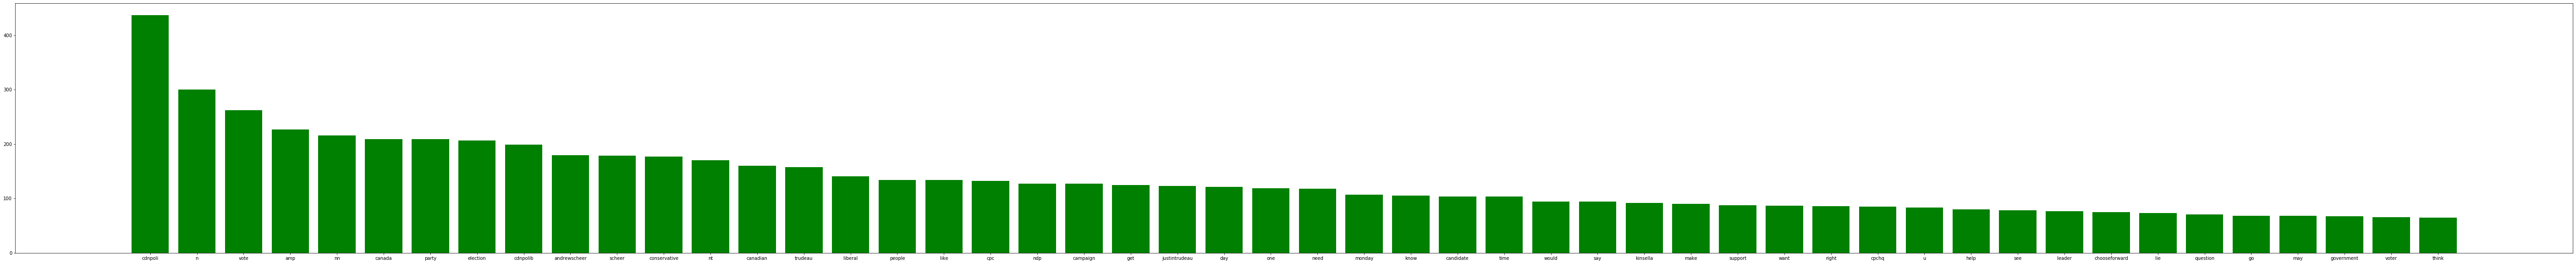

In [20]:
wordBag = Elect_StringForWC.split()

wordfreq = []
for word in wordBag:
    wordfreq.append(wordBag.count(word))

pairs = dict(zip(wordBag, wordfreq))
top50 = dict(collections.Counter(pairs).most_common(50))

plt.figure(figsize=(100,10))
plt.bar(list(top50.keys()), top50.values(), color='g')
plt.show()

This is a quick to histogram to visualize the top 50 frequent words from the Election Tweets

In [21]:
#Function to determine political affiliation of each tweet
def politicalParty(tweet):
    
    liberalBag = ['liberal','liberals','justin','left','trudeau','justintrudeau','justin trudeau','lpc','liberalparty','kinsellawarren','kinsella','warren','kinsellagate',
                  'climate change','prochoice','proabortion','abortion','climate','vankayak','chooseforward','choose forward']
    conservativeBag = ['right','conservative','conservatives','scheer','andrew','andrew scheer','andrewscheer','cpchq','conservativeparty','antiabortion',
                       'free market','prolife','tax']
    ndpBag = ['ndp','jagmeet','singh','jagmeetsingh','jagmeet singh','farleft','left','newleft','new','democratic','lgbtq+','environment']
    otherBag = ['maximebernier','maxime','bernier','greenparty','canadiangreens']
    
    LibCheck = [ele for ele in liberalBag if(ele in tweet)]
    if(bool(LibCheck) == True):
        return 'Liberal Party of Canada'
    
    ConCheck = [ele for ele in conservativeBag if(ele in tweet)]
    if(bool(ConCheck) == True):
        return 'Conservative Party of Canada'
    
    NDPCheck = [ele for ele in ndpBag if(ele in tweet)]
    if(bool(NDPCheck) == True):
        return 'New Democratic Party of Canada'
    
    otherCheck = [ele for ele in otherBag if(ele in tweet)]
    if(bool(otherCheck) == True):
        return 'Other minor party'
    
    return 'None'

In [22]:
PartyList = []
for tweet in elect_df['cleaned_tweets']:
    PartyList.append(politicalParty(tweet))
elect_df['Political Party Affiliation'] = PartyList

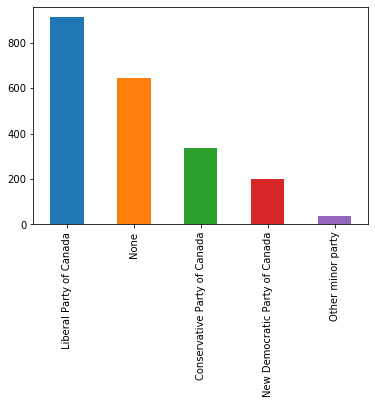

In [23]:
elect_df['Political Party Affiliation'].value_counts().plot.bar()

We see that the Liberal Party is most talked about in the tweets. The Conservative Party comes next and then the NDP. Due to the quick and dirty nature of word search, most tweets have fallen into the 'None' category.

In [24]:
WordCount_OG = []  
for tweet in elect_df['text']:
    WordCount_OG.append(len(tweet.split()))
elect_df['No_Words_OriginalTweets'] = WordCount_OG

WordCount_Cleaned = []  
for tweet in elect_df['cleaned_tweets']:
    WordCount_Cleaned.append(len(tweet.split()))
elect_df['No_Words_CleanedTweets'] = WordCount_Cleaned

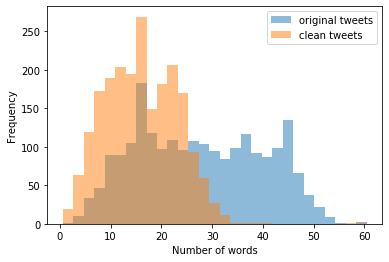

In [25]:
bins = np.linspace(0.5, 60.5, 30)
plt.hist(elect_df['No_Words_OriginalTweets'], bins=bins, alpha=0.5, label='original tweets')
plt.hist(elect_df['No_Words_CleanedTweets'], bins=bins, alpha=0.5, label='clean tweets')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('words.png', dpi=300, format='png')

This shows the word distribution of raw tweets vs clean tweets. We can see that the cleaned tweets are more concise and have frequently occuring words and this is a desirable characteristic for Feature Engineering.

#### Sentiment Data Visualizations

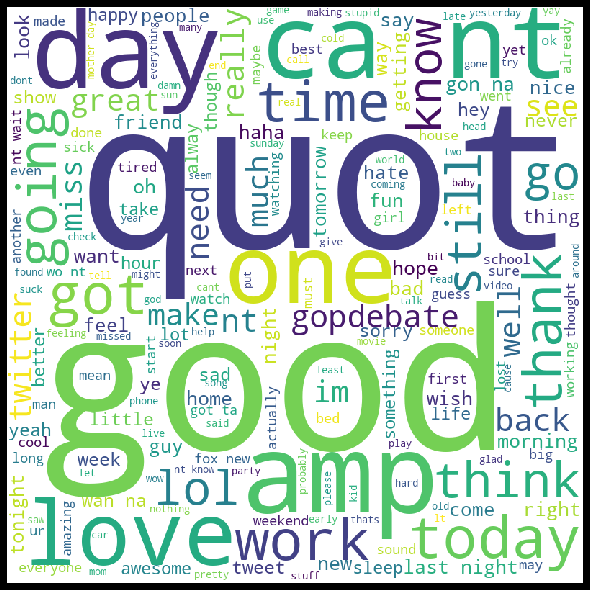

In [26]:
#Generating word cloud for sentiment analysis
Senti_StringForWC = ""
for tweet in senti_df['cleaned_tweets']:
    if(type(tweet) == str):
        for word in tweet:
            Senti_StringForWC = Senti_StringForWC + word

generateWordCloud(Senti_StringForWC)

The words good, love, work, day, one, today, thank & twitter seem very poular from the Word Cloud.

In [27]:
WordCount_OG = []  
for tweet in senti_df['text']:
    if(type(tweet) == str):
        WordCount_OG.append(len(tweet.split()))
    else:
        WordCount_OG.append(0)                    
senti_df['No_Words_OriginalTweets'] = WordCount_OG

WordCount_Cleaned = []  
for tweet in senti_df['cleaned_tweets']:
    if(type(tweet) == str):                        
        WordCount_Cleaned.append(len(tweet.split()))
    else:
        WordCount_Cleaned.append(0)
senti_df['No_Words_CleanedTweets'] = WordCount_Cleaned

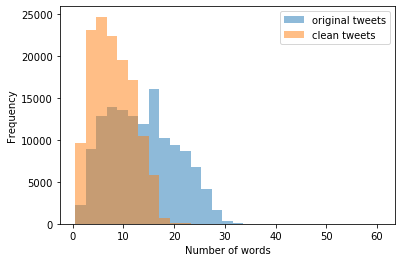

In [28]:
bins = np.linspace(0.5, 60.5, 30)
plt.hist(senti_df['No_Words_OriginalTweets'], bins=bins, alpha=0.5, label='original tweets')
plt.hist(senti_df['No_Words_CleanedTweets'], bins=bins, alpha=0.5, label='clean tweets')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('words.png', dpi=300, format='png')

This shows the word distribution of raw tweets vs clean tweets. We can see that the cleaned tweets are more concise and have frequently occuring words and this is a desirable characteristic for Feature Engineering.

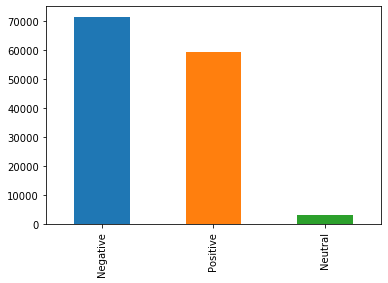

In [29]:
senti_df['sentiment'].value_counts().plot(kind = 'bar')

Since the neural tweets are few in number and it would be far more convenient to treat this as a binary classification problem because elections tweets are either positive or negative, we choose to drop the neutral tweets. 

In [30]:
#We can drop the neutral tweets
senti_df.drop( senti_df[senti_df['sentiment'] == 'Neutral'].index , inplace = True)

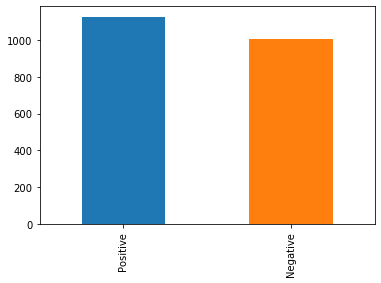

In [31]:
elect_df['sentiment'].value_counts().plot(kind = 'bar')

### Model Preparation

#### Word Frequency

In [32]:
X = senti_df['cleaned_tweets']
y = senti_df['sentiment']
y.replace({'Positive': 0, 'Negative': 1}, inplace = True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
WF_vector = CountVectorizer()
WF_train = WF_vector.fit_transform(X_train)
WF_test = WF_vector.transform(X_test)

#### TF - IDF

In [35]:
TFIDF_vector = TfidfVectorizer()
TFIDF_train = TFIDF_vector.fit_transform(X_train)
TFIDF_test = TFIDF_vector.transform(X_test)

#### Function to plot learning curve

In [36]:
#Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

### Model Implementation

We will implement the models in the following order: Logistic Regression, kNN Classifier, Naive Bayes, SVM, Decision Trees, Random Forests and xGB Classifer. Cross validation and Hyper Parameter Tuning will be performed wherever necessary. 

#### Logistic Regression

In [37]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [38]:
model = LogisticRegression()
model.fit(WF_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
model.predict(WF_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [40]:
model.score(WF_test, y_test)

0.7686028417642408

In [41]:
model_TFIDF = LogisticRegression()
model_TFIDF.fit(TFIDF_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
model_TFIDF.predict(TFIDF_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
model.score(TFIDF_test, y_test)

0.7514349123746843

<module 'matplotlib.pyplot' from 'C:\\Users\\aruns\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

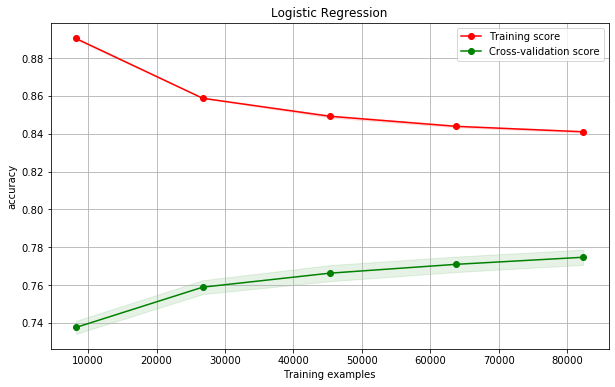

In [44]:
#Build & run a model for logistic regression model = LogisticRegression
model = LogisticRegression()
model.fit(TFIDF_train, y_train)
prob = model.predict_proba(TFIDF_train)
y_predicted = model.predict(TFIDF_train)

plot_learning_curve(model,'Logistic Regression', TFIDF_train, y_train, cv=10)

#### Cross Validation

In [45]:
#Cross Validation - WF model
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_trainCV, X_testCV = X.values[train_idx], X.values[test_idx]
    y_trainCV, y_testCV = y.values[train_idx], y.values[test_idx]
    
    WF_vectorCV = CountVectorizer()
    WF_trainCV = WF_vectorCV.fit_transform(X_trainCV)
    WF_testCV = WF_vectorCV.transform(X_testCV)
    
    model.fit(WF_trainCV, y_trainCV)
    
    predictions = model.predict(WF_testCV)
    
    TN = confusion_matrix(y_testCV, predictions)[0][0]
    FP = confusion_matrix(y_testCV, predictions)[0][1]
    FN = confusion_matrix(y_testCV, predictions)[1][0]
    TP = confusion_matrix(y_testCV, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.772%
Fold 2: Accuracy: 0.774%
Fold 3: Accuracy: 0.774%
Fold 4: Accuracy: 0.773%
Fold 5: Accuracy: 0.771%
Fold 6: Accuracy: 0.776%
Fold 7: Accuracy: 0.771%
Fold 8: Accuracy: 0.774%
Fold 9: Accuracy: 0.773%
Fold 10: Accuracy: 0.775%
Average Score: 77.355%(0.158%)


In [46]:
#Cross Validation - TFIDF model
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_trainCV, X_testCV = X.values[train_idx], X.values[test_idx]
    y_trainCV, y_testCV = y.values[train_idx], y.values[test_idx]
    
    TFIDF_vectorCV = TfidfVectorizer()
    TFIDF_trainCV = TFIDF_vector.fit_transform(X_trainCV)
    TFIDF_testCV = TFIDF_vector.transform(X_testCV)
    
    model.fit(TFIDF_trainCV, y_trainCV)
    
    predictions = model.predict(TFIDF_testCV)
    
    TN = confusion_matrix(y_testCV, predictions)[0][0]
    FP = confusion_matrix(y_testCV, predictions)[0][1]
    FN = confusion_matrix(y_testCV, predictions)[1][0]
    TP = confusion_matrix(y_testCV, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.779%
Fold 2: Accuracy: 0.779%
Fold 3: Accuracy: 0.778%
Fold 4: Accuracy: 0.776%
Fold 5: Accuracy: 0.774%
Fold 6: Accuracy: 0.781%
Fold 7: Accuracy: 0.779%
Fold 8: Accuracy: 0.778%
Fold 9: Accuracy: 0.779%
Fold 10: Accuracy: 0.776%
Average Score: 77.791%(0.197%)


#### Hyper Parameter Tuning

In [47]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X):
            X_trainHP, X_testHP = X.values[train_idx], X.values[test_idx]
            y_trainHP, y_testHP = y.values[train_idx], y.values[test_idx]
            
            TFIDF_vectorHP = TfidfVectorizer()
            TFIDF_trainHP = TFIDF_vector.fit_transform(X_trainHP)
            TFIDF_testHP = TFIDF_vector.transform(X_testHP)
            
            model.fit(TFIDF_trainHP, y_trainHP)

            predictions = model.predict(TFIDF_testHP)

            TN = confusion_matrix(y_testHP, predictions)[0][0]
            FP = confusion_matrix(y_testHP, predictions)[0][1]
            FN = confusion_matrix(y_testHP, predictions)[1][0]
            TP = confusion_matrix(y_testHP, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 1, 'solver': 'newton-cg'}
Best Score: 77.793%(0.2%)

The optimal log model uses C=1, and a newton-cg solver, and has a cross validation score of 77.793% with a standard deviation of 0.2%


#### k-Nearest Neighbours

In [48]:
knn_class = neighbors.KNeighborsClassifier(n_neighbors=5, leaf_size = 10)
knn_class.fit(WF_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
knn_class.predict(WF_test)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [50]:
knn_class.score(WF_test, y_test)

0.6637585775873065

##### Finding Optimal K and Bias-Variance Tradeoff

In [51]:
# A function to calculate bias
def my_bias(y_pred, y_test):
    y_pred = np.array(y_pred)
    y_test = np.array(y_test)
    average_ypred = np.mean(y_pred)
    average_ytest = np.mean(y_test)
    bia = np.power((average_ypred - average_ytest),2)
    return bia

In [52]:
# A function to calculate variance
def my_variance(y_pred):
    y_pred = np.array(y_pred)
    var = np.mean((y_pred - np.mean(y_pred))**2)
    return var

In [53]:
accuracy = []
accur_train = []
bias = []
var = []
loss= []
for k in [10,50,250,500,1000]:
    knn_class = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_class.fit(WF_train, y_train)
    train_predict = knn_class.predict(WF_train)
    test_predict = knn_class.predict(WF_test)
    accuracy_temp = (accuracy_score(test_predict, y_test))
    accuracy.append(accuracy_temp)
    train = round(accuracy_score(train_predict,y_train),5)*100
    accur_train.append(train)
    bias= np.append(bias, my_bias(test_predict,y_test))
    var = np.append(var, my_variance(test_predict))
    loss = np.append(loss, (log_loss(y_test,test_predict)))

(array([0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69]),
 <a list of 9 Text yticklabel objects>)

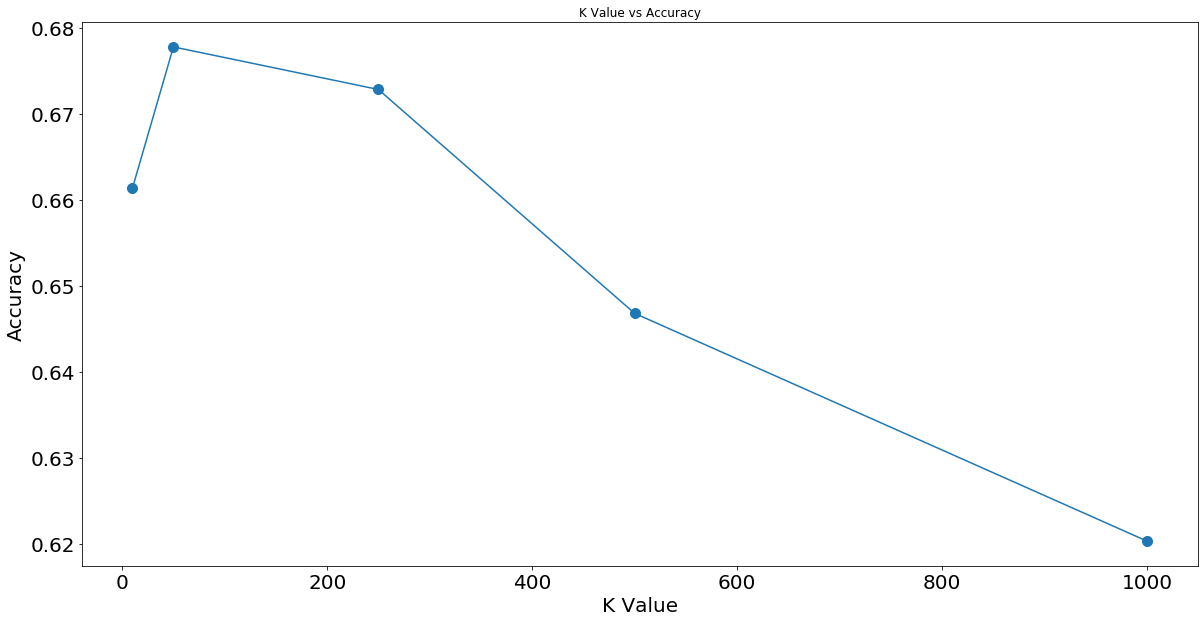

In [54]:
plt.figure(figsize = (20,10))
plt.plot([10,50,250,500,1000], accuracy, marker = 'o', markersize = 10)
plt.title('K Value vs Accuracy')
plt.xlabel('K Value', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

We see that the maximum accuracy achieved is at K value of 50.

In [55]:
df_clf = pd.DataFrame({'Bias':np.array(bias), 'Variance':np.array(var), 'loss': np.array(loss), 'kVal': np.array([10,50,250,500,1000])})

<Figure size 576x432 with 0 Axes>

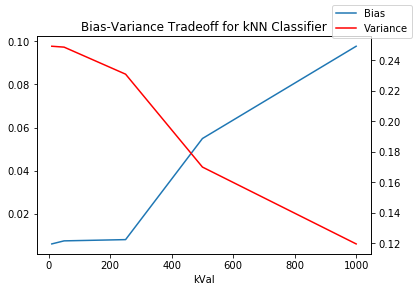

In [58]:
plt.figure(figsize=(8,6))

ax = df_clf.plot(x="kVal", y="Bias", legend=False)
ax2 = ax.twinx()
df_clf.plot(x="kVal", y="Variance", ax=ax2, legend=False, color="r")
ax.set_title('Bias-Variance Tradeoff for kNN Classifier')
ax.figure.legend()
plt.show()

We can see that a K value of around 425 provides a good bias - variance tradeoff and while we know from the previous graph that it doesn't provide the best accuracy, choosing this value will provide a good bias-variance tradeoff and ensure that the model is not over-fit or under-fit.

##### Hyperparameter Tuning

Note: We will skip Hyper Parameter Tuning for kNN because it takes a long time to run. However, the code below can be commented out to run it. 

In [ ]:
# params = {'n_neighbors': [400,425,500], 'weights':['uniform','distance'], 'p':[1,2]}

# knn = neighbors.KNeighborsClassifier()

# model = GridSearchCV(knn, params, cv=5, scoring='accuracy')
# model.fit(WF_train,y_train)
# best_params = model.best_params_

# print('The optimal value of K is:', best_params['n_neighbors'], best_params)

In [ ]:
# model=neighbors.KNeighborsClassifier(n_neighbors = best_params['n_neighbors'])

# model.fit(X_train,y_train)
# pred = model.predict(X_test)
# accur = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy').mean()
# print('The accuracy is: ', (accur*100),'%')

#### Naive Bayes (Multinomial) Classifier

In [59]:
clf = MultinomialNB()
clf.fit(WF_train, y_train)
clf.predict(WF_test)
clf.score(WF_test, y_test)

0.7577612815999591

In [60]:
clf_tf_idf = MultinomialNB()
clf_tf_idf.fit(TFIDF_train, y_train)
clf_tf_idf.predict(TFIDF_test)
clf_tf_idf.score(TFIDF_test, y_test)

0.7433738935231244

<module 'matplotlib.pyplot' from 'C:\\Users\\aruns\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

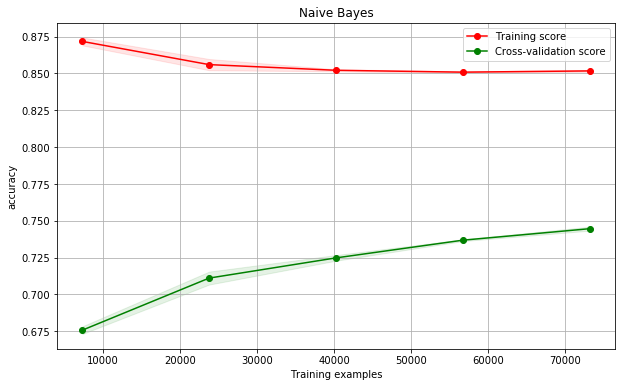

In [61]:
plot_learning_curve(clf_tf_idf,'Naive Bayes', TFIDF_train, y_train, cv=5)

#### Support Vector Machines Classifier

In [ ]:
# SVMClass = svm.SVC()
# SVMClass.fit(WF_train, y_train)
# SVMClass.predict(WF_test)
# SVMClass.score(WF_test, y_test)

In [ ]:
# SVM_tf_idf = svm.SVC()
# SVM_tf_idf.fit(TFIDF_train, y_train)
# SVM_tf_idf.predict(TFIDF_test)
# SVM_tf_idf.score(TFIDF_test, y_test)

NOTE: SVM Classifer takes an inordinate amount of time to run for this dataset and hence we will not use this for the model.

#### Decision Trees

In [62]:
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(WF_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
dt_clf.predict(WF_test)
dt_clf.score(WF_test, y_test)

0.7073033851177266

In [64]:
dt_tf_idf = tree.DecisionTreeClassifier()
dt_tf_idf.fit(TFIDF_train, y_train)
dt_tf_idf.predict(TFIDF_test)
dt_tf_idf.score(TFIDF_test, y_test)

0.7011555827657457

##### Bias-Variance Tradeoff

In [65]:
bias_DTclf = []
var_DTclf= []
loss_DTclf = []
max_depth =  np.array([5,10,20,50,100])
for m in max_depth:
    DTregressor = tree.DecisionTreeClassifier(max_depth = m)
    DTclf = DTregressor.fit(WF_train, y_train) 
    y_pred = DTclf.predict(WF_test)
    bias_DTclf.append(my_bias(y_pred,y_test))
    var_DTclf.append(my_variance(y_pred))
    loss_DTclf.append(log_loss(y_test,y_pred))

In [66]:
df_DTclf = pd.DataFrame({'Bias':np.array(bias_DTclf), 'Variance':np.array(var_DTclf), 'loss': np.array(loss_DTclf)}, index = np.array(max_depth))

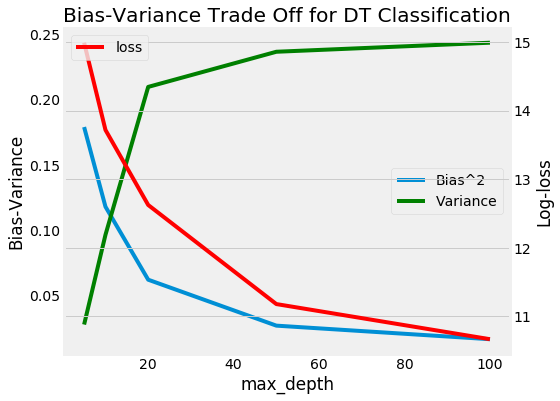

In [67]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = df_DTclf['Bias'].plot( label = 'Bias^2')
ax.set_ylabel("Bias")
ax.set_xlabel("max_depth")
ax.set_title("Bias-Variance Trade Off for DT Classification")
ax.legend(loc=1)


ax1 = df_DTclf['Variance'].plot(style='g', label='Variance')
ax1.set_ylabel("Bias-Variance")
ax1.legend(loc=2)

ax2 = df_DTclf['loss'].plot(secondary_y=True, style='r')
ax2.set_ylabel("Log-loss")
ax2.legend(loc=2)

plt.show()

We see that as size of the decision tree grows, while bias and loss are reduced considerably, variance grows immensely. We will now look to Random Forests to remediate this issue.

#### Random Forests

In [68]:
RF_class = RandomForestClassifier(random_state=0)

In [69]:
RF_class.fit(WF_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [70]:
RF_class.predict(WF_test)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [71]:
print("The accuracy score for the Random Forest model with Word Frequency is",RF_class.score(WF_test, y_test))

The accuracy score for the Random Forest model with Word Frequency is 0.7369965051911941


In [72]:
RF_tf_idf = RandomForestClassifier(random_state=0)
RF_tf_idf.fit(TFIDF_train, y_train)
RF_tf_idf.predict(TFIDF_test)
print("The accuracy score for the Random Forest model with TF-IDF is",RF_tf_idf.score(TFIDF_test, y_test))

The accuracy score for the Random Forest model with TF-IDF is 0.7327619193387924


##### Bias-Variance Tradeoff

In [73]:
bias_RFclf = []
var_RFclf= []
loss_RFclf = []
n_estimator =  np.array([5,10,20, 25, 50])
for n in n_estimator:
    RFregressor = RandomForestClassifier(n_estimators = n, random_state = 0)
    RFclf = RFregressor.fit(WF_train, y_train) 
    y_pred = RFclf.predict(WF_test)
    bias_RFclf.append(my_bias(y_pred,y_test))
    var_RFclf.append(my_variance(y_pred))
    loss_RFclf.append(log_loss(y_test,y_pred))

In [74]:
df_clf = pd.DataFrame({'Bias':np.array(bias_RFclf), 'Variance':np.array(var_RFclf), 'loss': np.array(loss_RFclf)}, index = np.array(n_estimator))

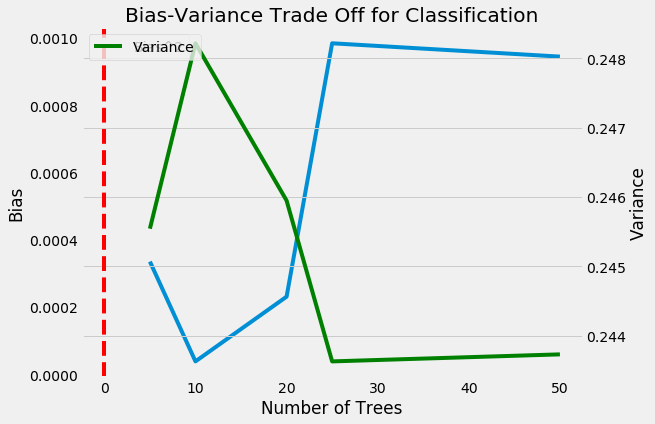

In [75]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax = df_clf['Bias'].plot( label = 'Bias^2')
ax.set_ylabel("Bias")
ax.set_xlabel("Number of Trees")
ax.set_title("Bias-Variance Trade Off for Classification")
ax.legend(loc=2)


ax1 = df_clf['Variance'].plot(secondary_y=True, style='g', label='Variance')
ax1.set_ylabel("Variance")
ax1.legend(loc=2)

plt.axvline(linestyle="--", color='red')
plt.show()

We can see that random forests perform better than decision trees when it comes to reducing variance and keeping bias low as well. A good trade-off between bias and variance can be achieved at n_estimators = 20. So, this is a good number for the model.

##### Hyper Parameter Tuning

In [75]:
n_estimators = [18,20,22,24]
max_depth = [5, 15, 30]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RF_class, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(WF_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 10.7min finished


#### Gradient Boosting - xGBoost

In [76]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [77]:
xgBmodel = XGBClassifier()

In [79]:
xgBmodel.fit(WF_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [80]:
xgBmodel.predict(WF_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [84]:
print('Accuracy of the xGB model with WF is',xgBmodel.score(WF_test, y_test))

Accuracy of the xGB model with WF is 0.7293946582995332


In [82]:
xgBmodel_TFIDF = XGBClassifier()
xgBmodel.fit(TFIDF_train, y_train)
xgBmodel.predict(TFIDF_test)
xgBmodel.score(TFIDF_test, y_test)

0.7399556133772097

In [85]:
print('Accuracy of the xGB model with TF-iDF is',xgBmodel.score(TFIDF_test, y_test))

Accuracy of the xGB model with TF-iDF is 0.7399556133772097


### Model Implementation - Election Data

In [86]:
X_elect = elect_df['cleaned_tweets']
y_elect = elect_df['sentiment']
y_elect.replace({'Positive': 0, 'Negative': 1}, inplace = True)

In [87]:
TFIDF_vector = TfidfVectorizer()
#Train model on Seniment data
TFIDF_train = TFIDF_vector.fit_transform(X)
#Fit model to Election Data
TFIDF_test = TFIDF_vector.transform(X_elect)

In [88]:
model_TFIDF = LogisticRegression(C = 1, solver = 'newton-cg')
model_TFIDF.fit(TFIDF_train, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
elect_prediction = model_TFIDF.predict(TFIDF_test)

In [90]:
model_TFIDF.score(TFIDF_test, y_elect)

0.6221284575714956

#### Model Evaluation

In [91]:
print(classification_report(elect_prediction, y_elect))

              precision    recall  f1-score   support

           0       0.58      0.66      0.62       987
           1       0.67      0.59      0.63      1146

   micro avg       0.62      0.62      0.62      2133
   macro avg       0.62      0.62      0.62      2133
weighted avg       0.63      0.62      0.62      2133



This indicates that model fares slightly with predicting negative tweets more than positive which is expected because of the number of negative tweets are marginally higher. Negative tweets have a higher precision meaning

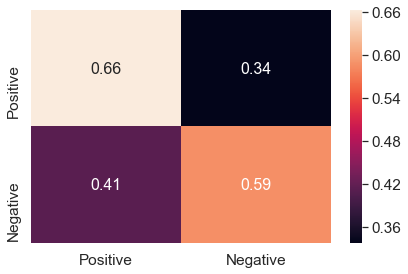

In [105]:
array= confusion_matrix(elect_prediction, y_elect)
normed_array = (array.T / array.astype(np.float).sum(axis=1)).T
df_cm = pd.DataFrame(normed_array, ['Positive','Negative'],['Positive','Negative'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Text(0, 0.5, 'Frequency')

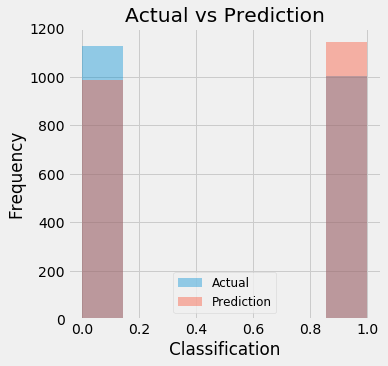

In [92]:
fig = plt.figure(figsize=(5,5))

ax = sns.distplot(y_elect,  kde=False, label='Actual')
ax = sns.distplot(elect_prediction,  kde=False,label='Prediction')
plt.legend(prop={'size': 12})
plt.title('Actual vs Prediction')
plt.xlabel('Classification')
plt.ylabel('Frequency')

In [93]:
elect_df['Predicted Sentiment'] = elect_prediction

In [94]:
elect_df['Predicted Sentiment'].replace({1: 'Negative', 0:'Positive'}, inplace = True)

In [95]:
elect_df['sentiment'].replace({1: 'Negative', 0:'Positive'}, inplace = True)

In [96]:
elect_df

,sentiment,negative_reason,text,cleaned_tweets,Political Party Affiliation,No_Words_OriginalTweets,No_Words_CleanedTweets,Predicted Sentiment
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadian ...,Liberal Party of Canada,44,20,Negative
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n spacestation n etobic...,None,9,9,Positive
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost billion next year ask jus...,Liberal Party of Canada,19,10,Negative
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadavotes n nnca nt decide help nn,None,9,8,Negative
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayer sick amp tired hard earned don...,Liberal Party of Canada,43,24,Negative
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",cdnpoli fact blastfromthepast conservative int...,Conservative Party of Canada,38,22,Negative
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",cdnmedia cdnpoli ppc rocky dong hand best elec...,None,28,20,Positive
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...",cdnpoli liberal double promised national debt ...,Liberal Party of Canada,47,23,Negative
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",chooseforward cdnpoli nt make america mistake ...,Liberal Party of Canada,15,11,Negative
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Wh...",cpckinsellagatenlet see receipt pay warren kin...,Liberal Party of Canada,15,13,Positive


Text(0, 0.5, 'Number of tweets correponding to actual sentiment')

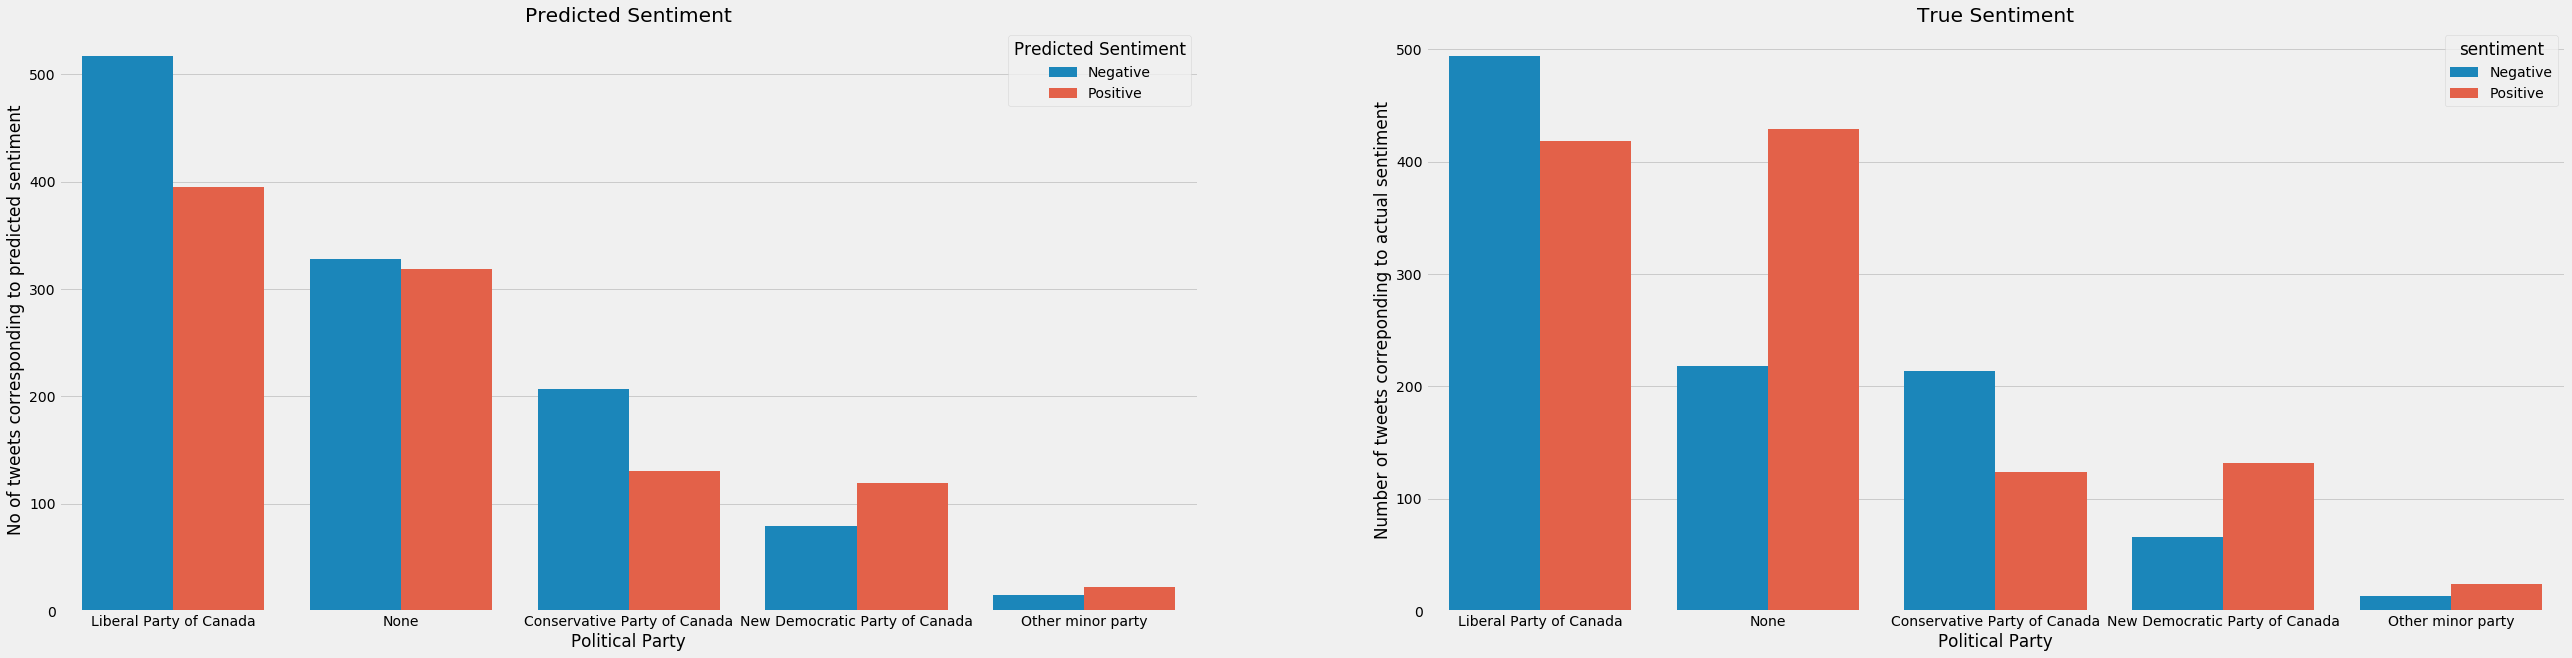

In [99]:
fig = plt.figure(figsize=(40,10))


ax1 = fig.add_subplot(1,2,1) 
ax1.set_title('Predicted Sentiment')
sns.countplot(data = elect_df, x = 'Political Party Affiliation', hue = 'Predicted Sentiment', ax = ax1 )
plt.xlabel('Political Party')
plt.ylabel('No of tweets corresponding to predicted sentiment')

ax2 = fig.add_subplot(1,2,2) 
ax2.set_title('True Sentiment')
sns.countplot(data = elect_df, x = 'Political Party Affiliation', hue = 'sentiment', ax = ax2)
plt.xlabel('Political Party')
plt.ylabel('Number of tweets correponding to actual sentiment')

From this, we can see that the model does a good job of predicting the sentiment for the four categories except None. Also, we can see that the liberal and conservative parties have received more negative tweets rather than positive tweets while the NDP has received more positive tweets than negative tweets (however, this needs to be considered with the fact that the number of people tweeting about NDP is significantly lower than liberal and conservative parties). The large number of negative tweets for the major parties can be explained by the nature of the Twitter platform that mangnifies and amplifies negativity more than positivity. 

NLP Analytics can indeed be useful when it comes to predicting party perception in the public eye and even predicting election outcomes since people ultimately vote with their hearts rather than brains. Since liberals have garnered the most number of tweets (both positive and negative) and so have the most mindspace with voters, it can be inferred that they would have gone on to win the election and the benefit of hindsight can confirm this hypothesis with the liberals winning the electoral college and with Mr. Justin Trudeau going on to become Prime Minister again.

### Predicting Reasons for Negative Sentiment

We will be using logistic regression, kNN and random forest classifiers to predict the reason behind negative tweets in the following code sections. Following this, I have explored the Word Embedding feature engineering technique as a Bonus. 

In [106]:
elect_df.head()

,sentiment,negative_reason,text,cleaned_tweets,Political Party Affiliation,No_Words_OriginalTweets,No_Words_CleanedTweets,Predicted Sentiment
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton instead suggestion agree canadian ...,Liberal Party of Canada,44,20,Negative
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",allwomanspacewalk real n spacestation n etobic...,None,9,9,Positive
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",brantford going cost billion next year ask jus...,Liberal Party of Canada,19,10,Negative
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",canada canadavotes n nnca nt decide help nn,None,9,8,Negative
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",canada taxpayer sick amp tired hard earned don...,Liberal Party of Canada,43,24,Negative


In [107]:
negative_election_df = elect_df[elect_df['sentiment'] == 'Negative']

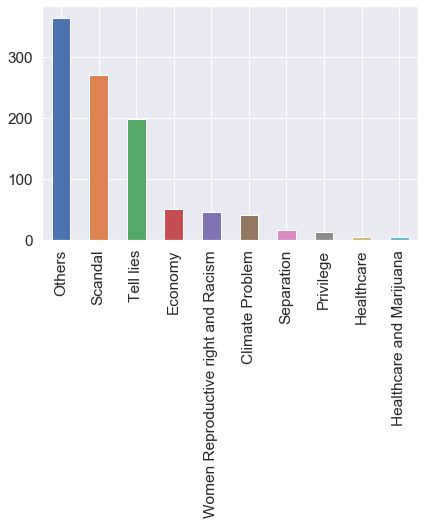

In [108]:
negative_election_df['negative_reason'].value_counts().plot(kind = 'bar')

#### Logistic Regression

In [109]:
X = negative_election_df['cleaned_tweets']
y = negative_election_df['negative_reason']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

TFIDF_reason_vector = TfidfVectorizer()
TFIDF_reason_train = TFIDF_reason_vector.fit_transform(X_train)
TFIDF_reason_test = TFIDF_reason_vector.transform(X_test)

In [110]:
reason_model = LogisticRegression(multi_class = 'ovr', C = 1, solver = 'newton-cg')

In [111]:
reason_model.fit(TFIDF_reason_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
reason_prediction = reason_model.predict(TFIDF_reason_test)

In [113]:
print('The accuracy of the reason predicting logistic classifier model is', reason_model.score(TFIDF_reason_test, y_test))

The accuracy of the reason predicting logistic classifier model is 0.48013245033112584


In [114]:
negative_election_df['negative_reason'].unique()

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Tell lies', 'Privilege', 'Climate Problem',
       'Healthcare', 'Separation', 'Healthcare and Marijuana'],
      dtype=object)

Since the number of tweets corresponding to reasons such as Economy, Womens Rights, Climate Change, etc. are very small in comparison to Scandal, Lies & Other and since the Others column leads the count, it skews the model towards Others. So, we begin by dropping the Others rows and aggregating reasons such as Economy, Women, etc. together in a meaningful way. I have come up with two categories: 'Economy & Health' and 'Social Issues'. 

In [115]:
negative_election_df.drop( negative_election_df[negative_election_df['negative_reason'] == 'Others'].index, inplace = True)

In [116]:
negative_election_df['negative_reason'].unique()

array(['Women Reproductive right and Racism', 'Economy', 'Scandal',
       'Tell lies', 'Privilege', 'Climate Problem', 'Healthcare',
       'Separation', 'Healthcare and Marijuana'], dtype=object)

In [117]:
negative_election_df.replace({'Economy':'Economy & Health', 'Privilege':'Social Issues','Climate Problem':'Social Issues', 'Separation':'Social Issues', 'Healthcare and Marijuana':'Economy & Health', 'Healthcare':'Economy & Health','Women Reproductive right and Racism':'Social Issues'}, inplace = True)

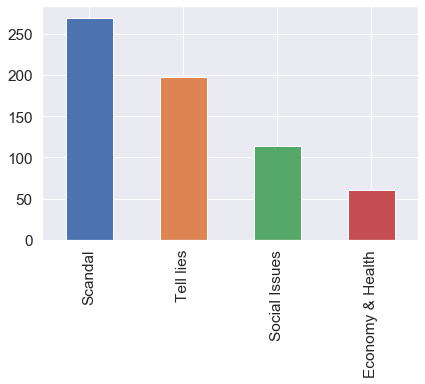

In [118]:
negative_election_df['negative_reason'].value_counts().plot(kind = 'bar')

In [119]:
X = negative_election_df['cleaned_tweets']
y = negative_election_df['negative_reason']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

TFIDF_reason_vector = TfidfVectorizer()
TFIDF_reason_train = TFIDF_reason_vector.fit_transform(X_train)
TFIDF_reason_test = TFIDF_reason_vector.transform(X_test)

In [120]:
reason_model = LogisticRegression(multi_class = 'ovr', C = 1, solver = 'newton-cg')

In [121]:
reason_model.fit(TFIDF_reason_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [122]:
reason_prediction = pd.Series(reason_model.predict(TFIDF_reason_test))

In [123]:
pred_df = pd.DataFrame()

In [124]:
pred_df['Predicted Reason'] = reason_prediction
pred_df['Actual Reason'] = y_test

Text(0, 0.5, 'Number of tweets correponding to reason')

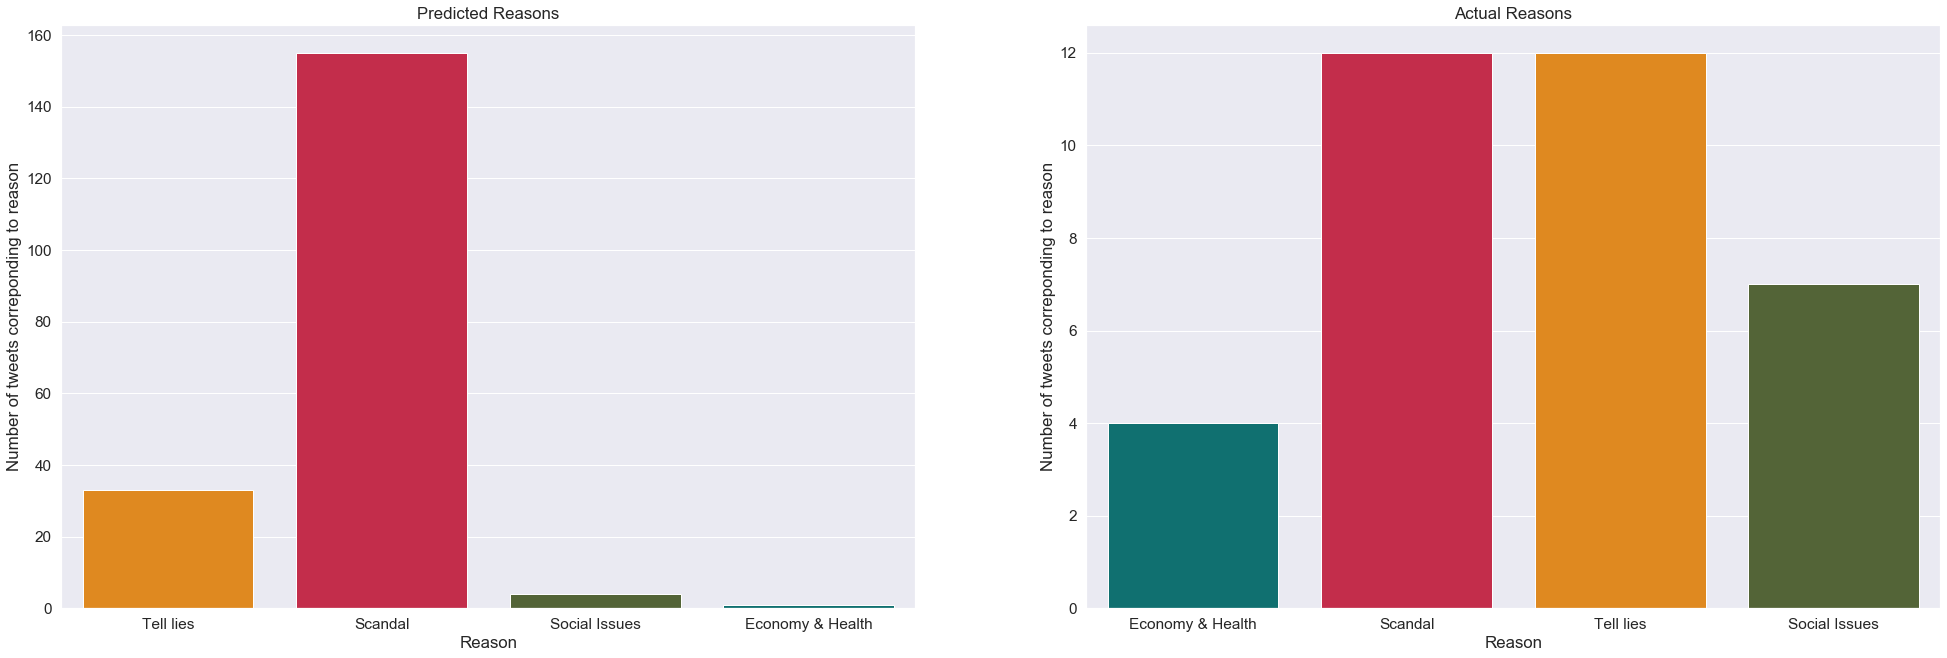

In [132]:
fig = plt.figure(figsize=(30,10))

color_code_1 = ['darkorange', 'crimson', 'darkolivegreen', 'teal']
color_code_2 = ['teal', 'crimson', 'darkorange', 'darkolivegreen']

ax1 = fig.add_subplot(1,2,1) 
ax1.set_title('Predicted Reasons')
sns.countplot(data = pred_df , x = 'Predicted Reason', ax = ax1, palette = color_code_1)
plt.ylabel('No of tweets corresponding to predicted sentiment')
plt.xlabel('Reason')
plt.ylabel('Number of tweets correponding to reason')


ax2 = fig.add_subplot(1,2,2) 
ax2.set_title('Actual Reasons')
sns.countplot(data = pred_df, x = 'Actual Reason', ax = ax2, palette = color_code_2)
plt.xlabel('Reason') 
plt.ylabel('Number of tweets correponding to reason')

In [133]:
print(classification_report(reason_prediction, y_test))

                  precision    recall  f1-score   support

Economy & Health       0.06      1.00      0.11         1
         Scandal       0.95      0.50      0.65       155
   Social Issues       0.11      1.00      0.20         4
       Tell lies       0.32      0.55      0.40        33

       micro avg       0.52      0.52      0.52       193
       macro avg       0.36      0.76      0.34       193
    weighted avg       0.82      0.52      0.60       193



From the classification report, we can see that Scandal has been predicted with greatest precision (ratio of all the correct predictions of Scandal over all predictions of Scandal) and this is owing to the large number of sample data points. We also note that due to the low number of data points for Economy & health, social issues & tell lies, the corresponding precision and recall scores are affected. 

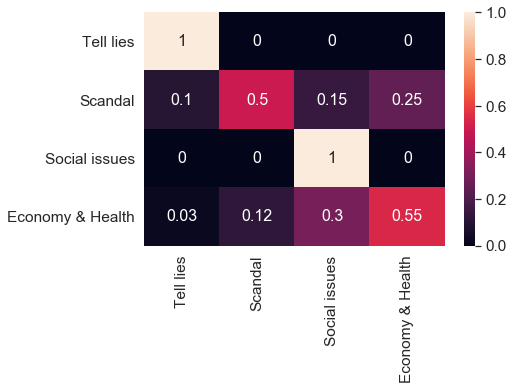

In [151]:
array = confusion_matrix(reason_prediction, y_test)
normed_array = (array.T / array.astype(np.float).sum(axis=1)).T
df_cm = pd.DataFrame(normed_array, ['Tell lies', 'Scandal', 'Social issues', 'Economy & Health'], ['Tell lies', 'Scandal', 'Social issues', 'Economy & Health'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


In [135]:
print('The accuracy of the reason predicting logistic model is', reason_model.score(TFIDF_reason_test, y_test))

The accuracy of the reason predicting logistic model is 0.5181347150259067


While the accuracy is better by 3 percent, we can still see that the model is excessively skewed to Scandal. Also, when we removed the 'Others' tweets, the total number of data points available was also significantly reduced. This explains the marked reduction in accuracy. 

#### k-Nearest Neighbours

In [144]:
knn_reason = neighbors.KNeighborsClassifier(n_neighbors = 50)
knn_reason.fit(TFIDF_reason_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [145]:
knn_reason_prediction = knn_reason.predict(TFIDF_reason_test)

In [146]:
print("The accuracy score of k-Nearest neigbours is is", knn_reason.score(TFIDF_reason_test, y_test))

The accuracy score of k-Nearest neigbours is is 0.533678756476684


In [147]:
knn_pred = pd.DataFrame()
knn_pred['Predicted Reason'] = knn_reason_prediction
knn_pred['Actual Reason'] = y_test

Text(0, 0.5, 'Number of tweets correponding to reason')

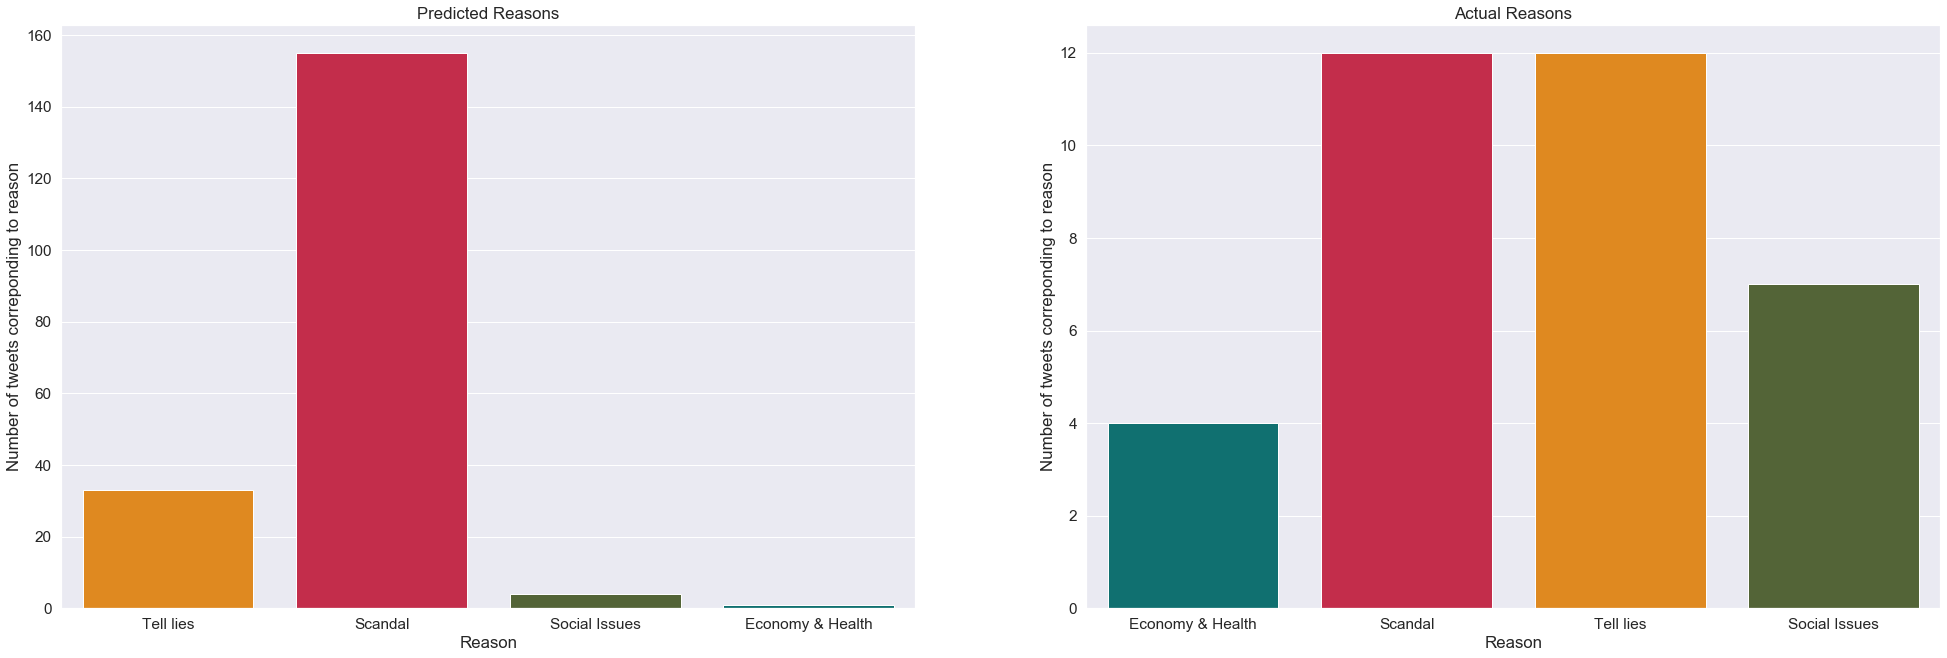

In [148]:
fig = plt.figure(figsize=(30,10))

color_code_1 = ['darkorange', 'crimson', 'darkolivegreen', 'teal']
color_code_2 = ['teal', 'crimson', 'darkorange', 'darkolivegreen']


ax1 = fig.add_subplot(1,2,1) 
ax1.set_title('Predicted Reasons')
sns.countplot(data = pred_df , x = 'Predicted Reason', ax = ax1 , palette = color_code_1)
plt.ylabel('No of tweets corresponding to predicted sentiment')
plt.xlabel('Reason')
plt.ylabel('Number of tweets correponding to reason')

ax2 = fig.add_subplot(1,2,2) 
ax2.set_title('Actual Reasons')
sns.countplot(data = pred_df, x = 'Actual Reason', ax = ax2, palette = color_code_2)
plt.xlabel('Reason') 
plt.ylabel('Number of tweets correponding to reason')

In [149]:
print(classification_report(knn_reason_prediction, y_test))

                  precision    recall  f1-score   support

Economy & Health       0.17      1.00      0.29         3
         Scandal       0.91      0.51      0.66       144
   Social Issues       0.14      0.83      0.23         6
       Tell lies       0.37      0.53      0.43        40

       micro avg       0.53      0.53      0.53       193
       macro avg       0.40      0.72      0.40       193
    weighted avg       0.76      0.53      0.59       193



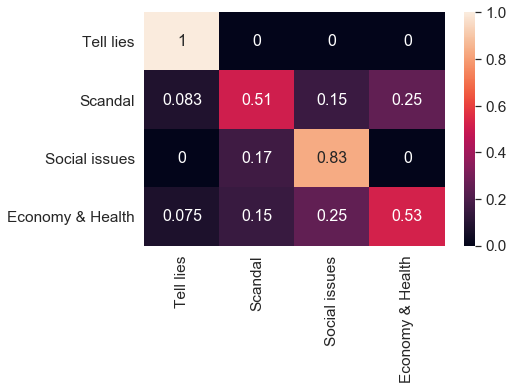

In [152]:
array = confusion_matrix(knn_reason_prediction, y_test)
normed_array = (array.T / array.astype(np.float).sum(axis=1)).T
df_cm = pd.DataFrame(normed_array, ['Tell lies', 'Scandal', 'Social issues', 'Economy & Health'], ['Tell lies', 'Scandal', 'Social issues', 'Economy & Health'])

# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

While the accuracy is marginally better for k-Nearest Neighbours, it still does not do a good job of predicting the actual category of reasons. Let's try Random Forest method.

#### Random Forests

In [153]:
RF_reason = RandomForestClassifier(n_estimators = 20, random_state=0)
RF_reason.fit(TFIDF_reason_train, y_train)
RF_reason_prediction = RF_reason.predict(TFIDF_reason_test)
RF_reason_accuracy = RF_reason.score(TFIDF_reason_test, y_test)

In [154]:
print("The accuracy score of Random Forest model is", RF_reason_accuracy)

The accuracy score of Random Forest model is 0.6113989637305699


In [155]:
print(classification_report(RF_reason_prediction, y_test))

                  precision    recall  f1-score   support

Economy & Health       0.33      1.00      0.50         6
         Scandal       0.81      0.58      0.68       114
   Social Issues       0.38      0.78      0.51        18
       Tell lies       0.56      0.58      0.57        55

       micro avg       0.61      0.61      0.61       193
       macro avg       0.52      0.73      0.56       193
    weighted avg       0.69      0.61      0.63       193



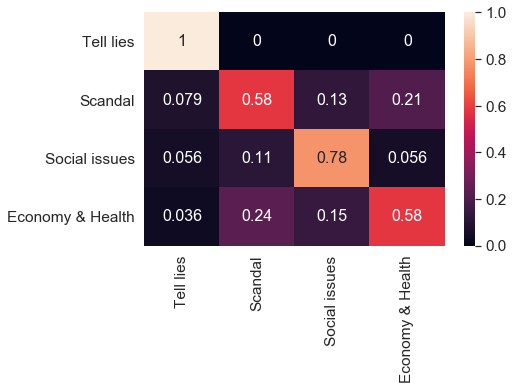

In [163]:
array = confusion_matrix(RF_reason_prediction, y_test)
normed_array = (array.T / array.astype(np.float).sum(axis=1)).T
df_cm = pd.DataFrame(normed_array, ['Tell lies', 'Scandal', 'Social issues', 'Economy & Health'], ['Tell lies', 'Scandal', 'Social issues', 'Economy & Health'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [158]:
RF_pred = pd.DataFrame()
RF_pred['Prediction'] = pd.Series(RF_reason_prediction)
RF_pred['Actual'] = y_test

Text(0, 0.5, 'Number of tweets correponding to reason')

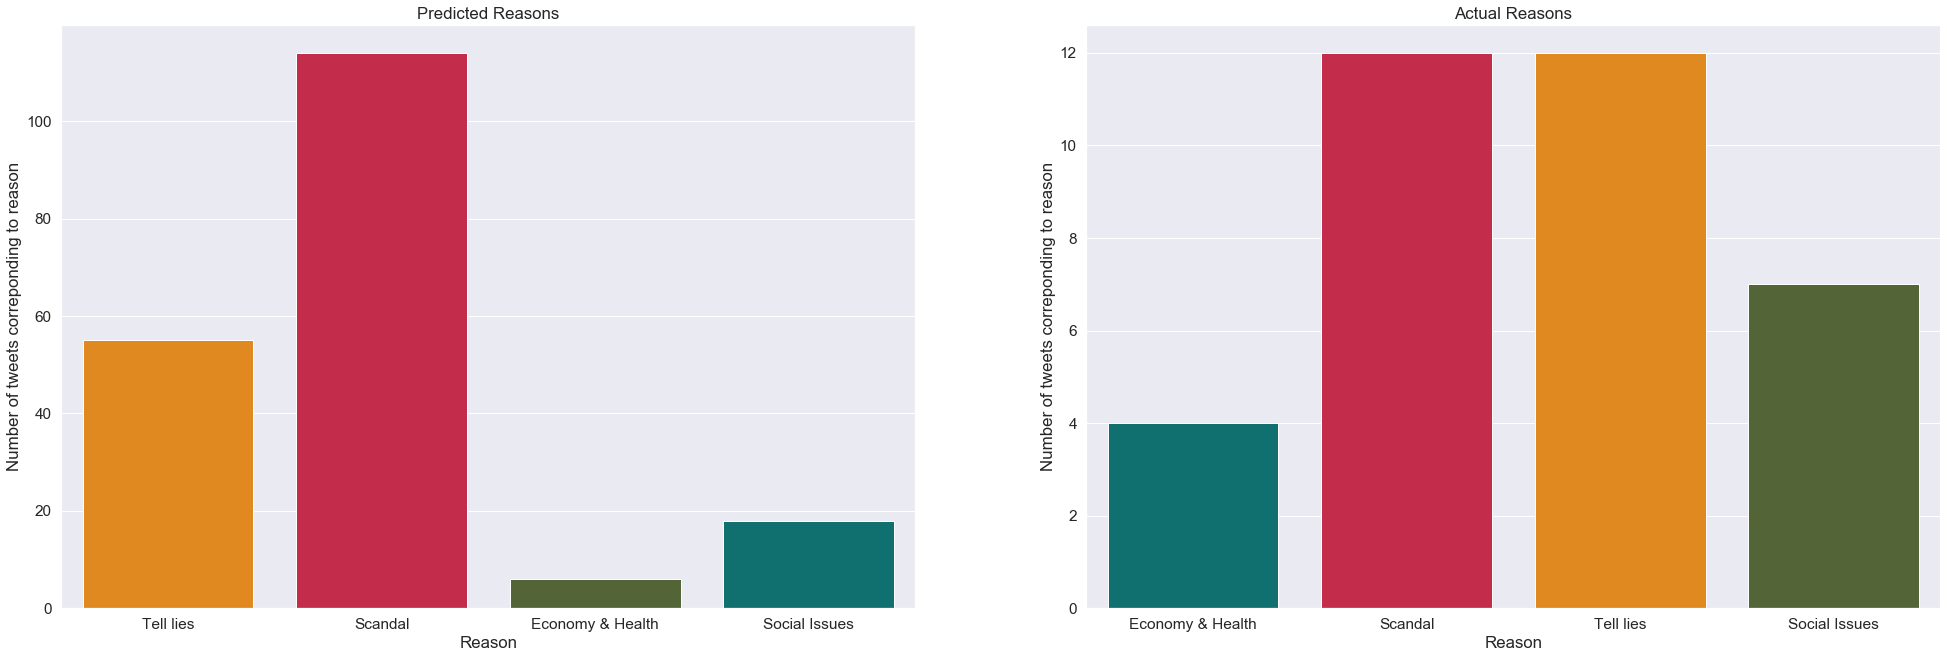

In [160]:
fig = plt.figure(figsize=(30,10))

color_code_1 = ['darkorange', 'crimson', 'darkolivegreen', 'teal']
color_code_2 = ['teal', 'crimson', 'darkorange', 'darkolivegreen']

ax1 = fig.add_subplot(1,2,1) 
ax1.set_title('Predicted Reasons')
sns.countplot(data = RF_pred , x = 'Prediction', ax = ax1, palette = color_code_1)
plt.ylabel('No of tweets corresponding to predicted sentiment')
plt.xlabel('Reason')
plt.ylabel('Number of tweets correponding to reason')

ax2 = fig.add_subplot(1,2,2) 
ax2.set_title('Actual Reasons')
sns.countplot(data = RF_pred, x = 'Actual', ax = ax2, palette = color_code_2)
plt.xlabel('Reason') 
plt.ylabel('Number of tweets correponding to reason')

While accuracy at 61.13 % is certaintly better, from the confusion matrix and classification report, we see that the model does significantly misclassify categories. 

### Discussion & Results

NLP is indeed a powerful tool to judge the sentiment of tweets and predict general sentiments and perceptions towards political parties as is evident from this excercise. The classification model perfors reasonably well (accuracy of 62%) considering the fact that we use word frequency feature engineering techniques that eliminate context from a tweet. Context plays a very important role when it comes to judging the sentiment of tweets. 

Also, another insightful observation that can be made is that the twp prominent political parties, liberals and conservatives have received more negative tweets than positive tweets. This speaks volumes about Twitter as a social media platform that amplifies and gives voice to negative sentiments, which are far more infectious than positive sentiments. 

The classification of reason behind negative reasons is harder to determine using these models largely due to two reasons:
1. Deletion of a large number of 'Other' reason tweets
2. Data being largely skewed to a few reasons
3. The reason behind a particular sentiment is again dependent heavily on context and reading between token words

The classification of reasons behin negative tweets and overall sentiment analysis can be improved by considering Recurrent Neural Networks and LSTMs that will do a greater job with prediction due to their ability to handle text sequences through sequential memory and information sharing across the entire tweet. The context of each tweet can be better captured through this process. 

### Bonus - Word Embedding

I will be exploring word embedding to predict the reason behind the negative tweets. This is done first by preparing the negative tweets for word embedding by removing special character, converting to lowe case & tokenizing. We won't be stemming or lemmatizing since we need full sentences for Word Embedding to be able to pick up on the context.

In [164]:
#Function to prepare for Word Embedding: remove special characters, convert to lower case & tokenize
def PrepForWordEmbedding(tweet):
    #remove the first character b
    tweet = re.sub('b"', '', tweet)        
    
    #before tokenizing, remove common content in tweets such as the RT sign, and links for retweets using regular expressions:
    tweet = re.sub(r'https?://\S+', '', tweet)
    tweet = re.compile('RT @').sub('@', tweet, count=1)
    
    #start by tokenize the tweet (separate it the text into words, or n-grams) with nltk
    word_tokens = word_tokenize(tweet) 
 
    #convert text into lowercase
    word_tokens = [word.lower() for word in word_tokens]
 
    #remove emoticons and emojis
    word_tokens = [word for word in word_tokens if not word in emoticons]
    word_tokens = [remove_emoji(word) for word in word_tokens]
    
    #remove punctuation signs from tokens
    table = str.maketrans('', '', string.punctuation)
    word_tokens = [word.translate(table) for word in word_tokens]
    
    #remove non-alphabetic characters
    word_tokens = [word for word in word_tokens if word.isalpha()]
    
    prepped_tweet = [] #create empty list to store the final tokens after text processing
    for w in word_tokens:
        prepped_tweet.append(w)

    #join the tokens of the clean tweet back into a string with spaces in between
    prepped_tweet_str = ' '.join(prepped_tweet)
    
    #return the clean tweet string
    return prepped_tweet_str 

We will now train the Word2Vec model on a large corpus of data and we will use the negative reasons tweets themselves. The reason behind the choice of this for training the model is because sentiment.csv has a very large number of words and caused a memory error while training this. Also, pre-trained models such as Google's Word2Vec are very large (1.5GB) and can't easily be downloaded. So, considering all of this, we will go ahead with the negative reasons corpus. Also, using a larger corpus would guarantee a greater accuracy but will also result in a larger training time & memory usage. So, I'll be sticking to this corpus. 

In [165]:
WordEmbedTweetList = [] 
for tweet in negative_election_df['text']:
    
    if( type(tweet) == str ):
        WordEmbedTweetList.append(PrepForWordEmbedding(tweet))
    else:
        WordEmbedTweetList.append('')
    
negative_election_df['Word Embedding Text'] = WordEmbedTweetList

In [166]:
#Build a corpus to train the Word2Vec model
corpus = []    
for sentence in negative_election_df['Word Embedding Text']:
    splits = sentence.split()
    corpus_loop = []
    for word in splits:
        corpus_loop.append(word)
    corpus.append(corpus_loop)

In [167]:
# Get count of words in corpus
counter = 0
for sentence in corpus:
    for word in sentence:
        counter += 1
print(counter)

19842


In [171]:
model = Word2Vec(corpus, size=55840, min_count = 1)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [172]:
#Vectorizer code courtesy 
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.values())

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [173]:
WE_vectorizer = TfidfEmbeddingVectorizer(w2v)
WE_fit_vectorizer = WE_vectorizer.fit(X_train, y_train)
WE_train = WE_fit_vectorizer.transform(X_train)
WE_test = WE_vectorizer.transform(X_test)

In [174]:
RF_reason = RandomForestClassifier(n_estimators = 20, random_state=0)
RF_reason.fit(WE_train, y_train)
RF_reason_prediction = RF_reason.predict(WE_test)
RF_reason_accuracy = RF_reason.score(WE_test, y_test)

In [175]:
print("Accuracy of the RF classifier with Word Embeddings is",RF_reason_accuracy) 

Accuracy of the RF classifier with Word Embeddings is 0.37823834196891193


In [177]:
print(classification_report(RF_reason_prediction, y_test))

                  precision    recall  f1-score   support

Economy & Health       0.06      0.33      0.10         3
         Scandal       0.62      0.44      0.51       114
   Social Issues       0.24      0.39      0.30        23
       Tell lies       0.23      0.25      0.24        53

       micro avg       0.38      0.38      0.38       193
       macro avg       0.29      0.35      0.29       193
    weighted avg       0.46      0.38      0.41       193



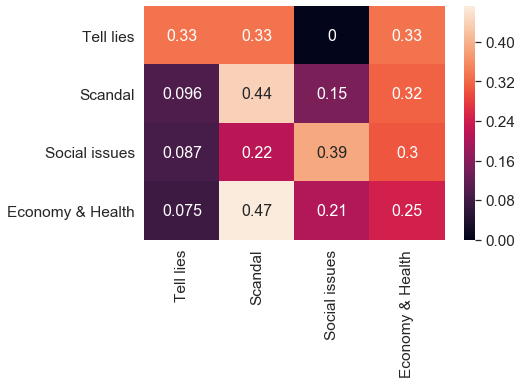

In [176]:
array = confusion_matrix(RF_reason_prediction, y_test)
normed_array = (array.T / array.astype(np.float).sum(axis=1)).T
df_cm = pd.DataFrame(normed_array, ['Tell lies', 'Scandal', 'Social issues', 'Economy & Health'], ['Tell lies', 'Scandal', 'Social issues', 'Economy & Health'])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

The accuracy obtained is not surprising and is expected due to:  

1. the relatively small corpus that was used for training the Word2Vec model. Increasing the corpus size would certainly result in an increased accuracy for the model. 

2. Tweets are inherently short and users tend to use quick and convenient ways of typing rather than using full words. A lot of context is lost due to this and context is everything when it comes to Word2Vec.
    